In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# generate synthetic data
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)
labels = (features[:, 0] + features[:, 1] > 1).astype(int) # purchase(one), not purchase(zero)
# convert to DataFrame
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels


In [3]:
from sklearn.model_selection import train_test_split
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
	df[['VisitDuration', 'PagesVisited']], 
	df['Purchase'], 
	test_size=0.2, 
	random_state=42
)

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# build a simple neural network model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)), # input layer with 2 features
    Dense(1, activation='sigmoid') # output layer for binary classification
])
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# train the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4563 - loss: 0.6769  
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4563 - loss: 0.6718 
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4750 - loss: 0.6674 
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4812 - loss: 0.6627 
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4938 - loss: 0.6578 
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5063 - loss: 0.6530 
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5250 - loss: 0.6482 
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5500 - loss: 0.6436 
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5875 - loss: 0.6387 
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6000 - loss: 0.6342 


In [5]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7250 - loss: 0.5987
Test Loss: 0.5986841917037964, Test Accuracy: 0.7250000238418579


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6094 - loss: 0.6338 - val_accuracy: 0.6562 - val_loss: 0.6099
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6172 - loss: 0.6304 - val_accuracy: 0.6562 - val_loss: 0.6055
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6250 - loss: 0.6264 - val_accuracy: 0.6562 - val_loss: 0.6010
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6250 - loss: 0.6224 - val_accuracy: 0.7188 - val_loss: 0.5966
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6484 - loss: 0.6188 - val_accuracy: 0.7500 - val_loss: 0.5920
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6562 - loss: 0.6146 - val_accuracy: 0.7500 - val_loss: 0.5875
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6875 - loss: 0.6105 - val_accuracy: 0.7500 - val_loss: 0.5827
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7188 - loss: 0.6066 - val_accuracy: 0.7812 - val_loss:

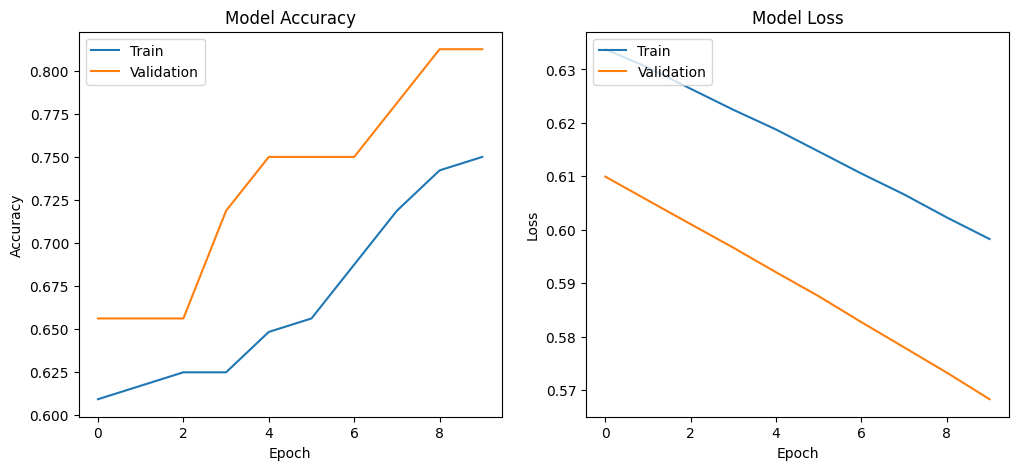

In [6]:
# visualize the training process
# supress warnings
import warnings
warnings.filterwarnings("ignore")

# train the model and save history
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

# plott the training and validation loss and accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


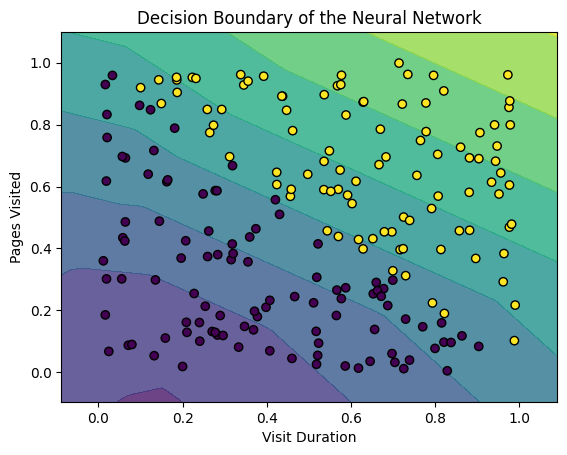

In [7]:
# visualize the decision boundary
# generate a grid over the feature space
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
# predict on the grid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# plot the contour and the training points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolors='k')
plt.title('Decision Boundary of the Neural Network')
plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.show()